# Exercício 1 — Classificação Multiclasse (Wine Dataset)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# 🔹 1. Carregar e preparar os dados


In [2]:
data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

y_cat = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# 🔹 2. Criar e treinar a rede neural (Keras)

In [3]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5266 - loss: 1.0653 - val_accuracy: 0.6552 - val_loss: 0.8950
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6211 - loss: 0.8695 - val_accuracy: 0.7931 - val_loss: 0.7552
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7947 - loss: 0.7111 - val_accuracy: 0.8966 - val_loss: 0.6313
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8513 - loss: 0.6048 - val_accuracy: 0.9655 - val_loss: 0.5205
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9446 - loss: 0.4693 - val_accuracy: 0.9655 - val_loss: 0.4178
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9770 - loss: 0.4222 - val_accuracy: 1.0000 - val_loss: 0.3316
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9582 - loss: 0.3212 - val_accuracy: 1.0000 - val_loss: 0.2579
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9811 - loss: 0.2456 - val_accuracy: 1.0000 - val_loss: 0.1986
Ep

# 🔹 3. Avaliar o modelo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0204

✅ Acurácia (Keras): 1.0000


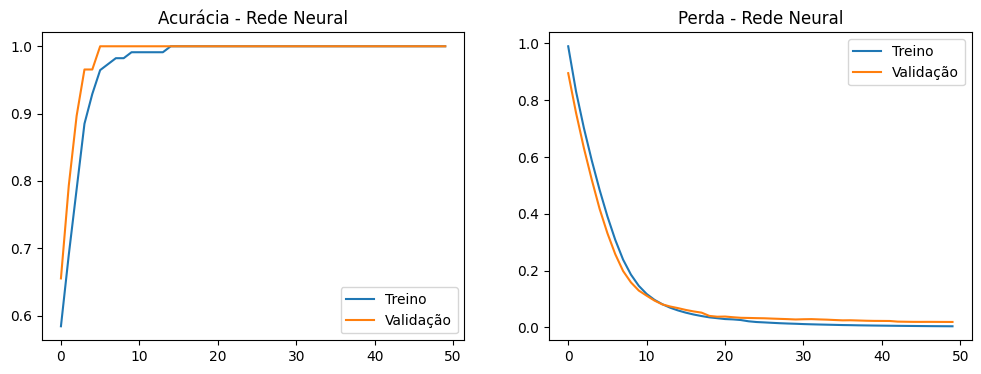

In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Acurácia (Keras): {test_acc:.4f}")

# Plotar gráfico de acurácia e perda
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia - Rede Neural')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda - Rede Neural')
plt.legend()
plt.show()

# 🔹 4. Comparar com RandomForestClassifier

In [5]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, np.argmax(y_train, axis=1))
y_pred = clf.predict(X_test)

acc_rf = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"✅ Acurácia (RandomForest): {acc_rf:.4f}")


✅ Acurácia (RandomForest): 1.0000


# 🔹 5. Conclusão

In [6]:
if test_acc > acc_rf:
    print("\n🔸 O modelo Keras teve melhor desempenho.")
elif test_acc < acc_rf:
    print("\n🔸 O modelo RandomForest teve melhor desempenho.")
else:
    print("\n🔸 Ambos os modelos tiveram desempenho semelhante.")


🔸 Ambos os modelos tiveram desempenho semelhante.
